In [1]:
def increase_call_stack_limit(mount: int):
    import sys

    # Get the current recursion limit
    current_limit = sys.getrecursionlimit()
    print(f"Current recursion limit: {current_limit}")

    # Set a new recursion limit
    sys.setrecursionlimit(mount)
    print(f"New recursion limit: {mount}")


increase_call_stack_limit(100000)

Current recursion limit: 3000
New recursion limit: 100000


In [2]:
from src.ga.gene.shape.shape_variations import (
    donut_params,
    circle_params,
    triangle_params,
    wing_params,
    hole_params,
)
from src.ga.gene.shape.shape_gene import ShapeGene

[VectorStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[VectorStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[VectorStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json


# Generate random shape genes

[StochasticStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__shape_gene_pdf.json
[VectorStorage]: JSON data saved to /Users/june/Documents/project/cau/4_1/capstone_design_1/__gene_parameters.json


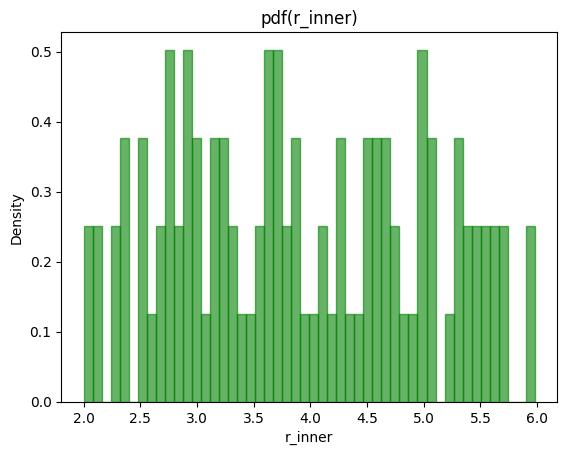

In [5]:
genes: list[ShapeGene] = []
for i in range(100):
    genes.extend(
        [
            ShapeGene(donut_params, gene_id=i),
            # ShapeGene(donut_params, gene_id=f"{i}_a"),
            # ShapeGene(donut_params, gene_id=f"{i}_b"),
            ShapeGene(circle_params, gene_id=i),
            ShapeGene(triangle_params, gene_id=i),
            ShapeGene(wing_params, gene_id=i),
            ShapeGene(hole_params, gene_id=i),
        ]
    )

# Mutation logics, uncomment to test
for gene in genes:
    gene.mutate("rand")

ShapeGene.pdf_storage.save()
ShapeGene.parameter_storage.save()

ShapeGene.pdf_storage.plot_distribution("r_inner")

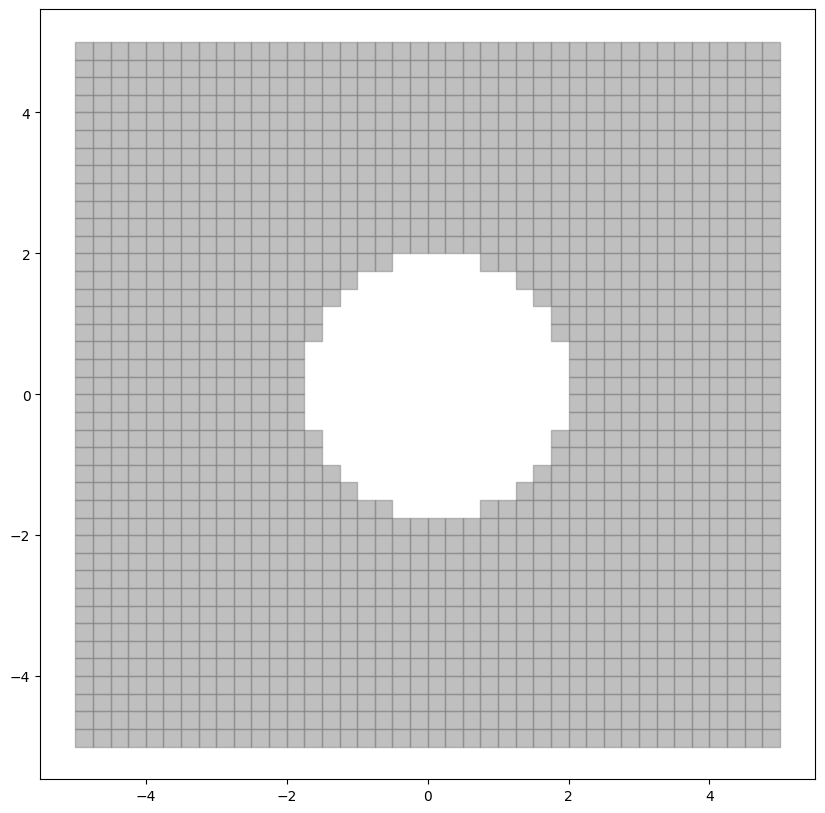

In [8]:
from src.grid.visualize_points import visualize_points


visualize_points(genes[9].pattern_unit.shape_matrix, genes[0].param.k)